In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_train = train_path = '/content/drive/MyDrive/AI/Data/Train'
x_test = test_path = '/content/drive/MyDrive/AI/Data/Test'

In [4]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 18803 images belonging to 41 classes.
Found 0 images belonging to 0 classes.


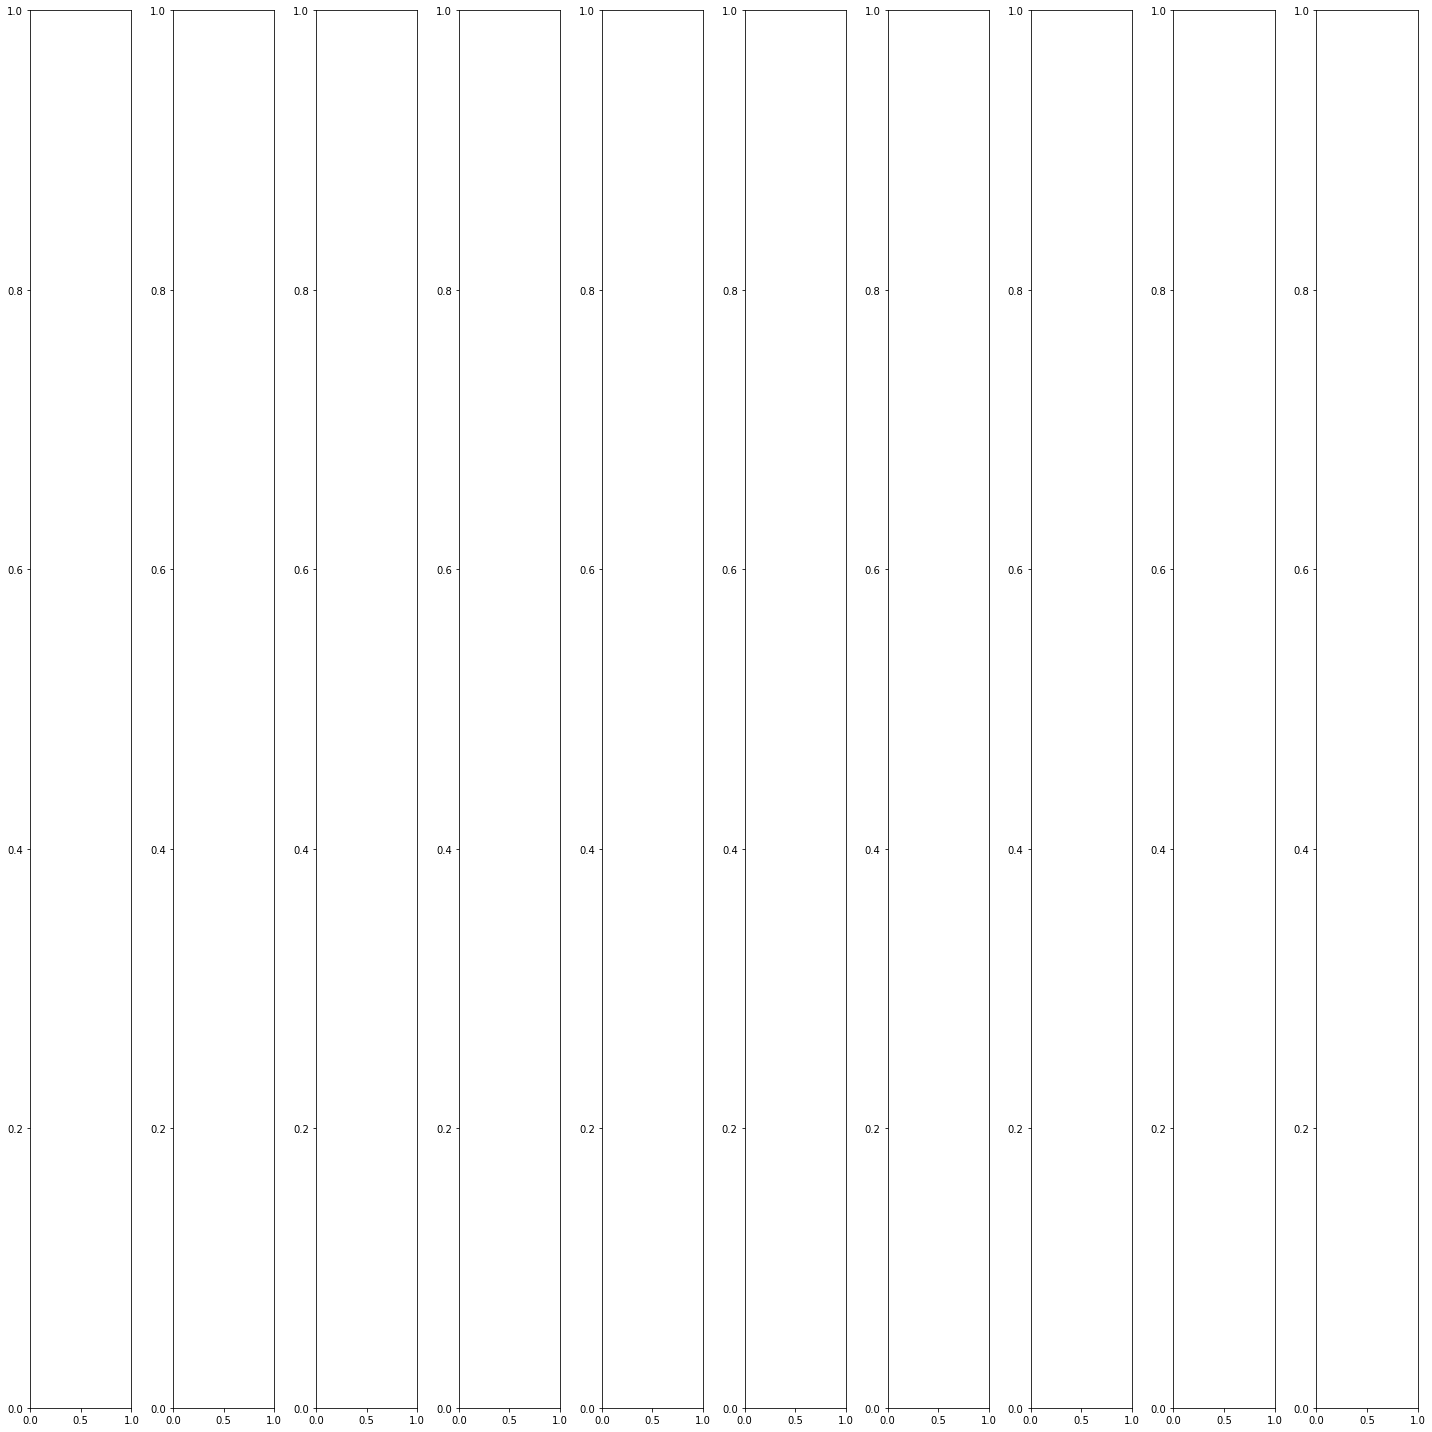

In [5]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [9]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=41, activation='softmax') ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [10]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches),validation_data=test_batches, epochs=4, verbose=1)

Epoch 1/4
1881/1881 [==============================] - 3151s 2s/step - loss: 0.8310 - accuracy: 0.7740
Epoch 2/4
1881/1881 [==============================] - 57s 30ms/step - loss: 0.1117 - accuracy: 0.9693
Epoch 3/4
1881/1881 [==============================] - 55s 29ms/step - loss: 0.0566 - accuracy: 0.9832
Epoch 4/4
1881/1881 [==============================] - 55s 29ms/step - loss: 0.0363 - accuracy: 0.9891


In [11]:
 model.save('datasets.h5')

In [13]:
classify = load_model('datasets.h5')
dic = train_batches.class_indices
dic

{'CamDiNguocChieu': 0,
 'CamOToTaiVuot': 1,
 'CamRePhai': 2,
 'CamVuot': 3,
 'CamXeTai': 4,
 'ChiDiThangHoacRePhai': 5,
 'CoOGa': 6,
 'CoTinHieuDen': 7,
 'CongTruong': 8,
 'DungLai': 9,
 'DuocDiThang': 10,
 'DuocDiThangHoacRePhai': 11,
 'DuocRePhai': 12,
 'DuocReTrai': 13,
 'DuongCam': 14,
 'DuongCoXeDapCat': 15,
 'DuongHepPhai': 16,
 'DuongTron': 17,
 'DuongUuTien': 18,
 'GiaoVoiDuongKhongUuTien': 19,
 'GiaoVoiDuongUuTien': 20,
 'HetCamOToTaiVuot': 21,
 'HetCamVuot': 22,
 'HetGioiHan89km h': 23,
 'HetLenhCam': 24,
 'HuongDiVongPhai': 25,
 'HuongDiVongTrai': 26,
 'NgoacNguyHiemBenPhai': 27,
 'NgoacNguyHiemBenTrai': 28,
 'NguoiDiBo': 29,
 'NguyHiemKhac': 30,
 'NhieuChoNgoac': 31,
 'ThuRungQuaDuong': 32,
 'TocDoDuoi20km h': 33,
 'TocDoDuoi30km h': 34,
 'TocDoDuoi50km h': 35,
 'TocDoDuoi60km h': 36,
 'TocDoDuoi70km h': 37,
 'TocDoDuoi80km h': 38,
 'TreEm': 39,
 'VongXuyen': 40}

kqua la: ['CamDiNguocChieu']


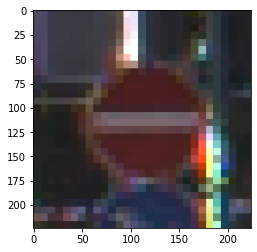

In [14]:
sample = load_img('/content/drive/MyDrive/AI/Data/Train/CamDiNguocChieu/00017_00001_00002.png', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['CamRePhai']


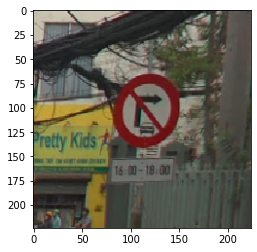

In [15]:
sample = load_img('/content/drive/MyDrive/AI/Data/Train/CamRePhai/3.png', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['DuocDiThang']


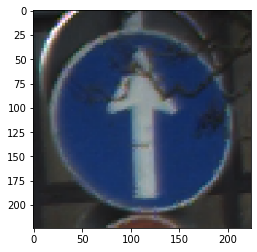

In [18]:
sample = load_img('/content/drive/MyDrive/AI/Data/Test/00009.png', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['HuongDiVongPhai']


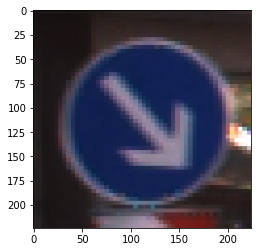

In [17]:
sample = load_img('/content/drive/MyDrive/AI/Data/Test/00005.png', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

KeyError: ignored

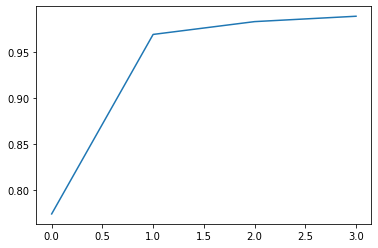

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper_left')